In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train[0], train[1]
x_test, y_test = test[0], test[1]

170500096/170498071 [==============================] - 2s 0us/step


## Preview image with opencv2

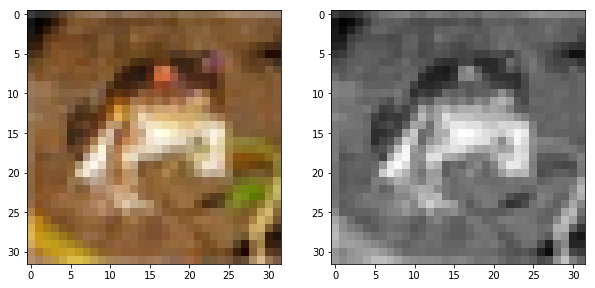

In [3]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(x_train[0])
ax2.imshow(cv2.cvtColor(x_train[0], cv2.COLOR_RGB2GRAY), cmap='gray');

## Color Histogram 
 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 
* imaages (list of array)
* channels：ex：[0]→Gray，[0, 1, 2]→RGB 3 colors
* mask：optional，Partial histogram if provided mask to stats.
* histSize：Pixel level for grouping(Bins size)，default is 256. Each channel could be assign different range.ex:[32,32,32] means 3 RGB channels be ranged 32 groups.
* ranges：range of pixel bit depth [0,256]，means <256.

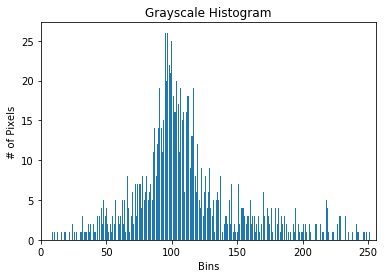

hist shape: (256, 1) 
check initial pixel value count:
 [[1.]
 [0.]]


In [4]:
hist = cv2.calcHist([cv2.cvtColor(x_train[0], cv2.COLOR_RGB2GRAY)], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.bar(list(range(0,256)), hist.reshape(-1))
plt.xlim([0, 256])
plt.show()
print("hist shape:", hist.shape, "\ncheck initial pixel value count:\n", hist[:2])
# 1 means pixel number count in 0 pixel level, 0 means no pixel number count in 1 pixel level.

Text(0.5, 1.0, 'Color_Histogram')

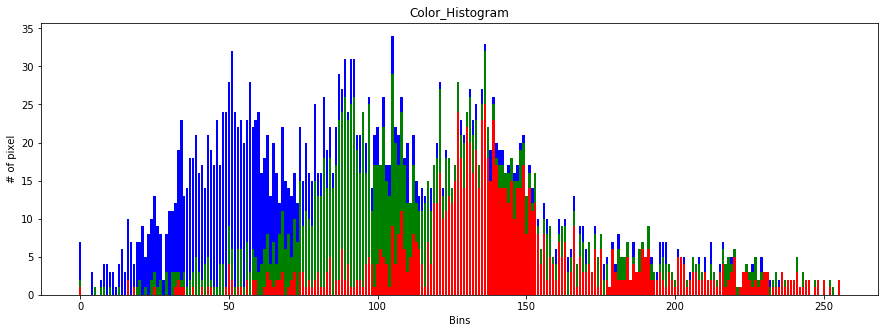

In [5]:
channels = cv2.split(x_train[0])
colors = ['r', 'g', 'b']
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1,1,1)
hist_stats={}
for idx, (ch, color) in enumerate(zip(channels, colors)):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    hist_stats[color] = hist.reshape(-1)
    if color == 'r':
        stack_bar = np.zeros(hist.reshape(-1).shape)
        ax.bar(list(range(0, 256)), hist.reshape(-1), color=color)
    else:
        stack_bar += hist_stats[colors[idx-1]]
        ax.bar(list(range(0, 256)), hist.reshape(-1), color=color, bottom=stack_bar)
    
ax.set_xlabel('Bins')
ax.set_ylabel('# of pixel')
ax.set_title('Color_Histogram')

## Bin size 16

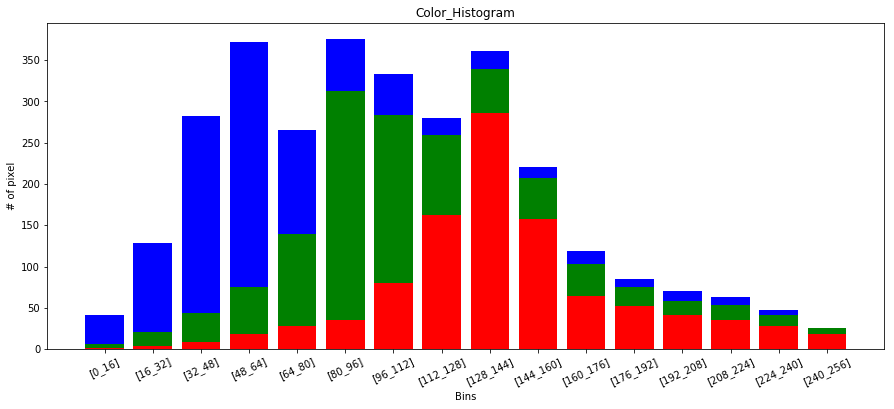

In [6]:
channels = cv2.split(x_train[0])
colors = ['r', 'g', 'b']
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1,1,1)
hist_stats = {}
for idx, (ch, color) in enumerate(zip(channels, colors)):
    hist = cv2.calcHist([ch], [0], None, [16], [0, 256])
    hist_stats[color] = hist.reshape(-1,)
    #print(hist)
    if color == 'r':
        stack_bar = np.zeros(hist.reshape(-1).shape)
        ax.bar(list(range(0, 16)), hist.reshape(-1), color=color)
    else:
        stack_bar += hist_stats[colors[idx-1]]
        ax.bar(list(range(0, 16)), hist.reshape(-1), color=color, bottom=stack_bar)
    #ax.plot(hist, color=color, linestyle='--')
    #ax.set_xticks(list(range(0,16)), [str(i*16) +'_'+str((i+1)*16) for i in range(0, 16)], rotation=45)
    plt.xticks(list(range(0,16)), ['['+str(i*16) +'_'+str((i+1)*16)+']' for i in range(0, 16)], rotation=25)
    ax.set_xlabel('Bins')
    ax.set_ylabel('# of pixel')
    ax.set_title('Color_Histogram')

In [7]:
color_hist_df = pd.DataFrame(hist_stats, index=list(range(0,16)))
color_hist_df['bin_range'] = pd.Series([str(i*16) +'_'+str((i+1)*16) for i in range(0, 16)])
color_hist_df

,r,g,b,bin_range
0,1.0,6.0,34.0,0_16
1,4.0,17.0,108.0,16_32
2,9.0,35.0,238.0,32_48
3,19.0,57.0,296.0,48_64
4,28.0,111.0,127.0,64_80
5,36.0,277.0,63.0,80_96
6,80.0,204.0,49.0,96_112
7,162.0,97.0,21.0,112_128
8,286.0,53.0,22.0,128_144
9,158.0,49.0,14.0,144_160
